## Лабораторная работа  по биометрии №3
<div style="text-align: right"> 
    Чангалиди Антон, P3214
<br>
   Исследование периодических составляющих вариабельности сердечного ритма
</div>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Прочитаем данные:

In [2]:
data = pd.read_csv('4_f_1.csv', names = ['R'])
data

,R
0,866
1,927
2,924
3,892
4,897
...,...
295,842
296,829
297,806
298,883


Возьму конкретную серию, чтобы было удобнее.

In [3]:
R = data.R

#### 1. По заданному массиву кардиоинтервалов рассчитать основные параметры вариабельности: 
* среднее значение $ M = \frac{\sum_{i=1}^n X_i}{n} $
* среднеквадратическое отклонение $SDNN = \sqrt{\frac{\sum{i=1}^n (M - X_i)^2}{n}} $,  
* коэффициент вариации $CV = \frac{SDNN}{M}*100\%$.

*(буду пользоваться стандартными функциями Пандаса)*

In [4]:
def statistics(series):
    M = series.mean()
    SDNN = series.std(ddof = 0)
    CV = SDNN / M * 100
    print(f'Среднее значение: {M}\nСтандартное отклонение: {SDNN}\nКоэффициент вариации: {CV} %')
    return M, SDNN, CV

In [5]:
M, SDNN, CV = statistics(R)

Среднее значение: 840.22
Стандартное отклонение: 66.71075575447585
Коэффициент вариации: 7.939677198171413 %


#### 2. По заданному массиву кардиоинтервалов построить гистограмму с шагом 50 мс (0.05 с)

In [6]:
def histogram(R):
    minimum = int(R.min() // 50 * 50)
    maximum = int(R.max() // 50 * 50)
    vals = []
    amounts = []
    print(f'Minimum = {R.min()}\nMaximun = {R.max()}\n')
    for i in range (minimum, maximum+50, 50):
        amounts.append(R.where(R >= i).where(R<i+50).count())
        vals.append(i)
    vals.append(maximum+50)
    plt.hist(x = R, bins = vals)
    plt.show()
    print('Проверка:')
    for i in range(len(amounts)):
        print(f'Для интервала {vals[i]}-{vals[i+1]} количество значений = {amounts[i]}')
    return amounts, vals

Minimum = 662
Maximun = 1056



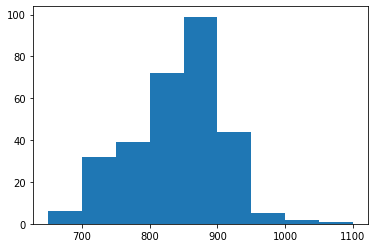

Проверка:
Для интервала 650-700 количество значений = 6
Для интервала 700-750 количество значений = 32
Для интервала 750-800 количество значений = 39
Для интервала 800-850 количество значений = 72
Для интервала 850-900 количество значений = 99
Для интервала 900-950 количество значений = 44
Для интервала 950-1000 количество значений = 5
Для интервала 1000-1050 количество значений = 2
Для интервала 1050-1100 количество значений = 1


In [7]:
amounts, vals = histogram(R)

#### 3. По полученному графику определить амплитуду моды АMо, которая соответствует максимальному значению, и моду Mо – значение аргумента в точке максимума.

    Ответ:
* АМо = $\frac{99}{300} \cdot 100\% = 33\%$
* Мода лежит в интервале 850-900. Можно заметить, что среднее значение (равное 850) лежит близко, но не в интервале Моды (так как плотность распределения не симметрична). Так как мы строили гистограмму, то для значения возьму среднее $Mo = \frac{900+850}{2} = 875\text{мс} = 0.875$ с


#### 4. Определить вариационный размах MxDMn.

* $MxDMn = 1056 - 662 = 394 \text{мс} = 0.394$ с

#### 5. Рассчитать индекс напряжения регуляторных систем ИН.
* $\text{ИН} = \frac{AMo \cdot 100\%}{2\cdot Mo \cdot MxDMn} = \frac{0.33 \cdot 100\%}{2\cdot 0.875 \cdot 0.394} = 47.86  \text{ у.е.}$
    
    (Достаточно спокойно)

#### 6. По заданному массиву кардиоинтервалов построить график автокоррелограммы.

Рабочая формула:

(Открываю с помощью кода, так как по-другому не вставлялось в отчет)

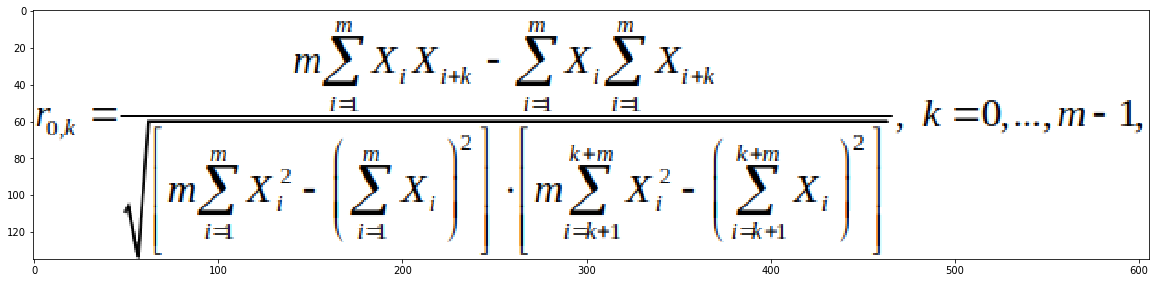

In [8]:
plt.figure(figsize=(20,10)) 
img = mpimg.imread('long_formula.png')
plt.imshow(img)

In [9]:
def r_0_k(R, k, m):
    r = R.to_numpy()
    rrr = (m * sum(r[0:m]*r[k:m+k]) - sum(r[0:m]) * sum(r[k:m+k])) /\
        math.sqrt((m * sum(r[0:m] ** 2) - sum(r[0:m]) ** 2) * (m * sum(r[k:k+m] ** 2) - sum(r[k:k+m]) ** 2))
    return rrr

In [10]:
def draw_autocorr(R, k_range):
    x = []
    y = []
    n = len(R)
    for k in range(0, k_range+1):
        x.append(k)
        y.append(r_0_k(R, k, n-k))
    plt.axhline(y=0, color='b', linestyle='-')
    plt.plot(x, y, 'b*')
    plt.show

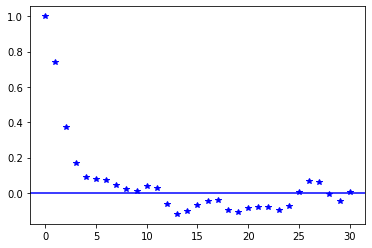

In [11]:
draw_autocorr(R, 30)

Построим график из библиотеки для сравнения:

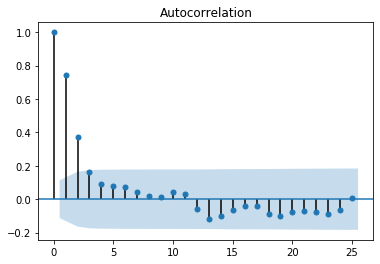

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(R)
plt.show()

Голубым показан доверительный интервал.


Все совпадает!

#### 7. Рассчитать значение коэффициента корреляции после первого сдвига СС1 и число сдвигов до первого нулевого значения коэффициента корреляции СС0. 

In [13]:
print(f'Коэффициент корреляции после первого сдвига:\nCC1 = {r_0_k(R, 1, len(R) - 1)}')

Коэффициент корреляции после первого сдвига:
CC1 = 0.7437720428042796


Так как коэффициент корреляции после первого сдвига лишь незначительно ниже единицы (на 0.25), значит доминируют медленноволновые компоненты).

Таким образом:
* $CC1 = 0.74$ (из расчетов)
* $CC0 = 12$ (видно по графику)

#### 8. По заданному массиву кардиоинтервалов построить корреляционную ритмограмму.

In [14]:
def ritmo(R):
    n = len(R)
    plt.figure(figsize=(5,5))
    plt.plot(R[0:n-1:]/1000,R[1:n:]/1000,'r+')
    plt.xlim(0.5, 1.5)
    plt.ylim(0.5, 1.5)
    plt.show()

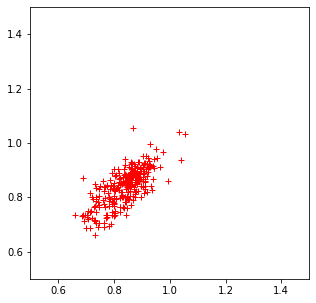

In [15]:
ritmo(R)

Все действительно группируется в один овал длиной примерно 0.4 (соответствует вариационному размаху и хорошо коррелирует с величиной мощности спектра высокочастотного компонента вариабельности HF), а ширина = 0.2 - с величиной мощности спектра низкочастотного компонента вариабельности с LF).